In [4]:
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import statsmodels.api as sm
import scipy as sp
import matplotlib.pyplot as plt
from numpy.linalg import inv
from math import inf

plt.style.use('dark_background')

# Regressions
## 1.Ordinary Least Squares $w_{LS}$

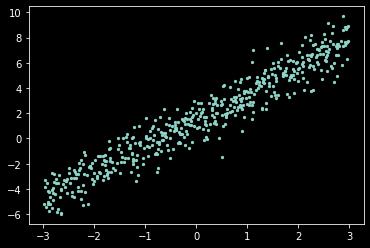

In [5]:
np.random.seed(133)

N = 500
b = [1.5,2]
e = np.random.randn(500)

X = np.random.choice(np.linspace(-3,3,1000),size=N,replace=False)
X = np.column_stack((np.ones(N),X))
y = X@b + e

plt.scatter(X[:,1],y,s=5)

Residual Error:-3.2462921240039577e-13


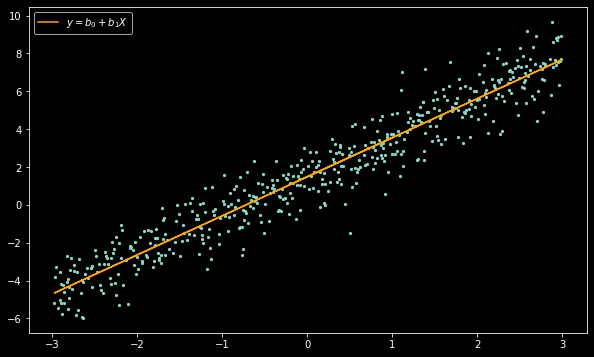

In [6]:
# Ordinary Least Sqares

w_ols = inv(X.T@X)@(X.T@y)
y_ols = X@w_ols
residuals = sum(y_ols-y)

print("Residual Error:{}".format(residuals))
plt.figure(figsize=(10,6))
plt.scatter(X[:,1],y,s=5)
plt.plot(X[:,1],y_ols,c='orange',label=r'$y=b_0 + b_1 X$')
plt.legend();

## 2.Ridge Regression $w_{RR}$

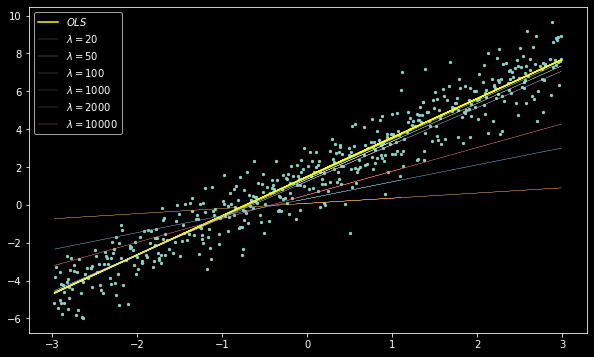

In [7]:
# Ridge Rgression
lam = [20,50,100,1000,2000,10000]

def Ridge(X,y,lam):
    I = np.identity(len(b))
    return inv(lam*I + X.T@X)@(X.T @y)

plt.figure(figsize=(10,6))
plt.scatter(X[:,1],y,s=5)
plt.plot(X[:,1],y_ols,c='yellow',label=r'$OLS$')
for l in lam:
    y_rr = X@Ridge(X,y,l)
    plt.plot(X[:,1],y_rr,label=f'$\lambda = {l}$',linewidth=0.25)
plt.legend();

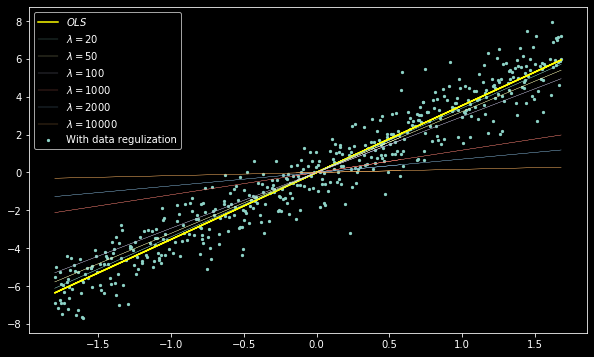

In [8]:
# Rideg regression with Data preprocessing

X[:,1:]= (X[:,1:]-X[:,1:].mean(axis=0))/X[:,1:].std(axis=0)
y = y-y.mean()
y_ls = X@Ridge(X,y,0)

plt.figure(figsize=(10,6))
plt.scatter(X[:,1],y,s=5,label='With data regulization')
plt.plot(X[:,1],y_ls,c='yellow',label=r'$OLS$')
for l in lam:
    y_rr = X@Ridge(X,y,l)
    plt.plot(X[:,1],y_rr,label=f'$\lambda = {l}$',linewidth=0.25)
plt.legend();

### non-linear data

In [9]:
np.random.seed(144)

N = 300
b = [1.5,2,-2]
e = np.random.normal(loc=0,scale=2,size=N)

x = np.random.choice(np.linspace(0,5,1000),size=N,replace=False)
X = np.column_stack((np.ones(N),x,np.log(x**2))) 
y = X@b + e


In [10]:
# we add ones to X and X^2 and continue as usual
X[:5]

array([[ 1.        ,  4.11411411,  2.82884706],
       [ 1.        ,  4.21921922,  2.87930018],
       [ 1.        ,  0.36036036, -2.04130149],
       [ 1.        ,  0.94594595, -0.1111397 ],
       [ 1.        ,  2.29229229,  1.65910464]])

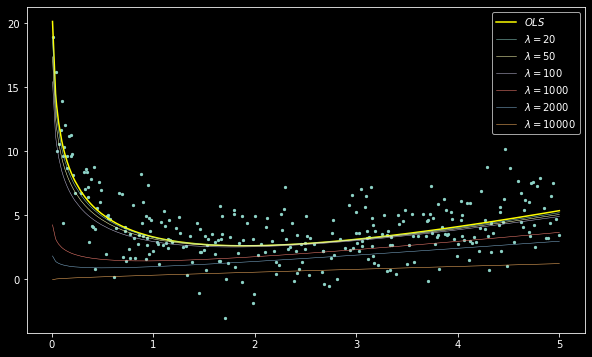

In [11]:

y_ols = X@(inv(X.T@X)@(X.T@y))

# Ridge Rgression
lam = [20,50,100,1000,2000,10000]
s = np.argsort(x)

plt.figure(figsize=(10,6))
plt.scatter(x,y,s=5)
plt.plot(x[s],y_ols[s],c='yellow',label=r'$OLS$')
for l in lam:
    y_rr = X@Ridge(X,y,l)
    plt.plot(x[np.argsort(x)],y_rr[np.argsort(x)],label=f'$\lambda = {l}$',linewidth=0.5)
plt.legend();

In [12]:
m = sm.OLS(y,X[:,-2:]) # drop the ones column
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              841.8
Date:                Wed, 27 May 2020   Prob (F-statistic):                   2.54e-123
Time:                        11:04:11   Log-Likelihood:                         -620.24
No. Observations:                 300   AIC:                                      1244.
Df Residuals:                     298   BIC:                                      1252.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7190      0.067     40.408      0.000       2.587       2.851
x2            -2.3689      0.083    -28.710      0.000      -2.531      -2.206
==============================================================================
Omnibus:                        1.745   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.490
Skew:                          -0.160   Prob(JB):                        0.475
Kurtosis:                       3.131   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.Maximum Likelihood $w_{ML}$

The asumption is that $y\sim (Xw|\sigma^2 I)$

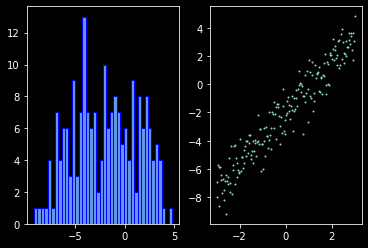

In [13]:
np.random.seed(110)

N = 200
b = [-2,1.75]
e = np.random.normal(size=N)
x = np.linspace(-3,3,N)
X = np.column_stack((np.ones(N),x))
y = X@b + e

# y appears to be normally distributed
fig =plt.figure(num=1)
ax1 = fig.add_subplot(121)
ax1.hist(y,bins=40,color='cornflowerblue',ec='b')
ax2 = fig.add_subplot(122)
ax2.scatter(x,y,s=1);

In [14]:
# bs is a vecotr that contains the intercept b0 and 
# define the log-likelihood function (minimize the negative = maximize likelihood)
def log_lik(bs,y,X):
    if bs[-1] <0: return inf
    lik = sp.stats.norm.pdf(y,loc=X@bs[:-1],scale=bs[-1])
    if all(v==0 for v in lik):return inf
    log_lik = np.log(lik[np.nonzero(lik)])
    return -sum(log_lik)

In [15]:
from scipy.optimize import minimize

optim = minimize(log_lik,x0=bs,args=(y,X))

NameError: name 'bs' is not defined

In [ ]:
optim

In [ ]:
w_ml = optim.x[:-1]
w_rr = Ridge(X,y,20)
w_ls = Ridge(X,y,0)

In [ ]:
y_ml = X@w_ml
y_rr = X@w_rr
y_ls = X@w_ls

plt.figure(figsize=(12,8))
plt.scatter(x,y,s=0.75)
plt.plot(x,y_ml,label='ML')
plt.plot(x,y_rr,label='Ridge')
plt.plot(x,y_ls,label='OLS')
plt.plot(x,X@b,label='Original')
plt.legend();

In [ ]:
print(f'Original:\t\t{b}\nMaximum Likelihood:\t{w_ml}\nRidge Regression:\t{w_rr}\nLeast Squares:\t\t{w_ls}')

# 4.Maximum Posterior $w_{MAP}$

We define a distribution on $w_{MAP}$ instead of just one value  

$\mu = (\lambda\sigma^2I+X^TX)^{-1}X^Ty$  
$\Sigma = (\lambda I +\sigma^{-2}X^TX)^{-1}$

In [ ]:
def MAP_regression(X,y,lam,sigma2):
    I = np.identity(X.shape[1])
    mu = inv(lam*sigma2*I + X.T@X)@X.T@y
    S = inv(lam*I+1/sigma2 * X.T@X)
    return mu,S

In [ ]:
np.random.seed(99)

N = 200
X = np.random.randn(N,3)
b = [1.5,2.25,-3.1]
epsilon = np.random.normal(loc=0,scale=2,size=N)
y = X@b + epsilon

sigma2 =2
lam = 0.1

In [ ]:
mu, S = MAP_regression(X,y,2,0.1);mu,S

To predict a value $y_0$ given $x_0$ we actually predict a distribution of possible values $\mu_0$ and $\sigma^2_0$ of each prediction:    
$\mu_0 = x^T_0\mu$  
$\sigma^2_0 = \sigma^2 + x^T_0\Sigma x_0$

In [ ]:
mu_0 = X[0].T@mu
sigma2_0 = sigma2 + X[0].T@S@X[0]

In [ ]:
sigma2_0,mu_0

In [ ]:
a = np.linspace(-4,12,50)
e = sp.stats.norm.pdf(a,loc=mu_0,scale=sigma2_0)

plt.plot(a,e)
plt.plot(np.ones(50)*mu_0,np.linspace(0,0.21,50),c='r',linestyle='dashed')
plt.xlabel(r'$y_0$')
plt.title("Probability Distribution of $y_0$ given $x_0, \mu & \Sigma$")
plt.ylim(0,0.21)

# 5. Minimum $l_2$ Regression

We use it if the number of features d is bigger than the number of samples n

# 6. LASSO Regression:

The same as Ridge regression in term of regularizing regression by penalizing w.  
In ridge we multiplied $\lambda.Slope^2$  
in LASSO we multiply $\lambda |Slope|$  

Sklean uses alpah for $\lambda$

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lr = Lasso(alpha=0.1)
lr.fit(X,y)

In [ ]:
lr.score(X,y)

In [ ]:
mu,b